# 제주도 도로 교통량 예측 AI 경진대회
- EDA 시각화

## 1. 데이터 확인

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

plt.rc('font', family='Malgun Gothic')

In [2]:
info = pd.read_csv('./data/data_info.csv')
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [4]:
info

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,road_in_use,도로사용여부
5,lane_count,차로수
6,road_rating,도로등급
7,multi_linked,중용구간 여부
8,connect_code,연결로 코드
9,maximum_speed_limit,최고속도제한


In [5]:
train.isna().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [6]:
column_names = train.columns.values.tolist()

for i in column_names:
    print(f'{i} = {train[i].nunique()}')
    
# 총 61개의 도로, 487개의 시작/도착 도로명

id = 4701217
base_date = 281
day_of_week = 7
base_hour = 24
lane_count = 3
road_rating = 3
road_name = 61
multi_linked = 2
connect_code = 2
maximum_speed_limit = 6
vehicle_restricted = 1
weight_restricted = 4
height_restricted = 1
road_type = 2
start_node_name = 487
start_latitude = 586
start_longitude = 586
start_turn_restricted = 2
end_node_name = 487
end_latitude = 586
end_longitude = 586
end_turn_restricted = 2
target = 102


In [7]:
train['base_date'] = pd.to_datetime(train['base_date'], format='%Y%m%d')
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


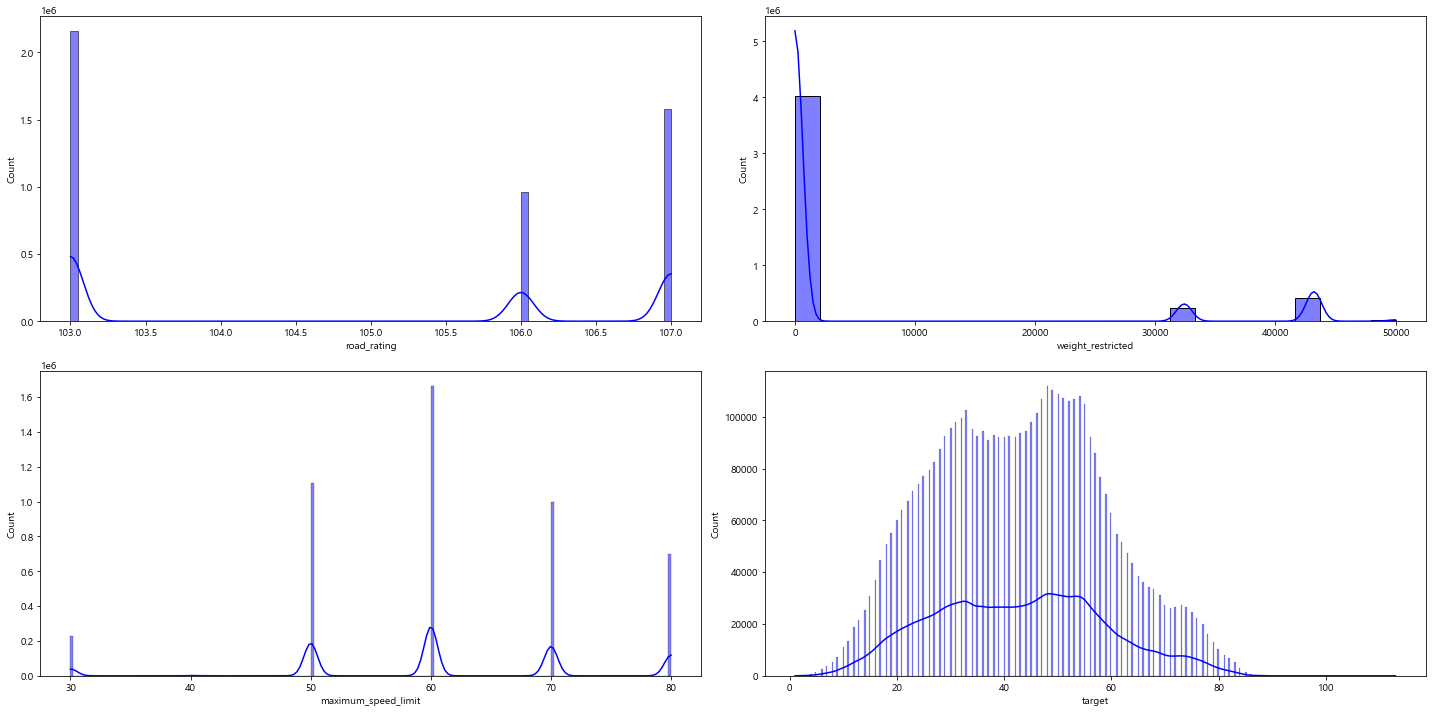

In [26]:
fig, axes = plt.subplots(2, 2, figsize=[20, 10])

sns.histplot(x=train['road_rating'],kde=True,ax=axes[0][0], color='blue')
sns.histplot(x=train['weight_restricted'],kde=True,ax=axes[0][1], color='blue')
sns.histplot(x=train['maximum_speed_limit'],kde=True,ax=axes[1][0], color='blue')
sns.histplot(x=train['target'],kde=True,ax=axes[1][1], color='blue')

plt.tight_layout()
plt.show()

# road_rating = 3개의 값
# weight_restricted = 대부분 0
# maximum_speed_limit = 60이 대다수
# 연속적인 데이터는 없음

## 2. Train / Test 세트 비교

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

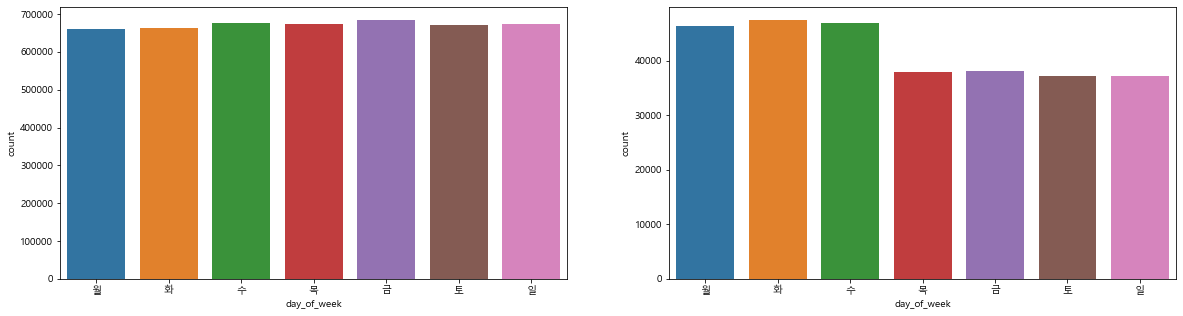

In [21]:
# day_of_week
date_order = ['월', '화', '수', '목', '금', '토', '일']
fig,ax = plt.subplots(figsize=[20, 5], ncols=2)

sns.countplot(x='day_of_week', data=train, ax=ax[0], order=date_order)
sns.countplot(x='day_of_week', data=test, ax=ax[1], order=date_order)

<AxesSubplot:xlabel='base_hour', ylabel='count'>

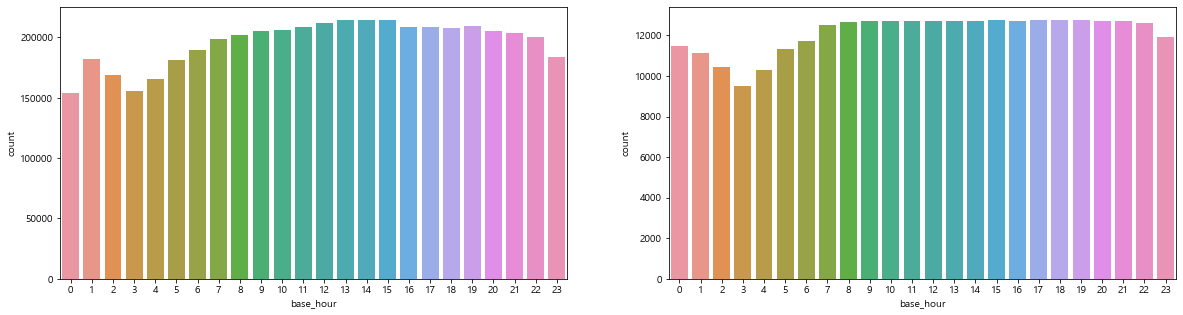

In [22]:
# base_hour
fig,ax = plt.subplots(figsize=[20, 5], ncols=2)

sns.countplot(x='base_hour', data=train, ax=ax[0])
sns.countplot(x='base_hour', data=test, ax=ax[1])

<AxesSubplot:xlabel='lane_count', ylabel='count'>

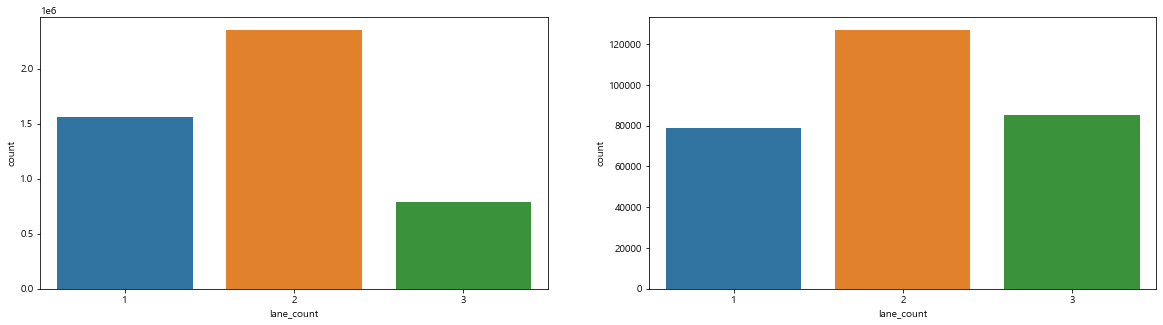

In [24]:
# lane_count
fig,ax = plt.subplots(figsize=[20, 5], ncols=2)

sns.countplot(x='lane_count', data=train, ax=ax[0])
sns.countplot(x='lane_count', data=test, ax=ax[1])

<AxesSubplot:xlabel='road_rating', ylabel='count'>

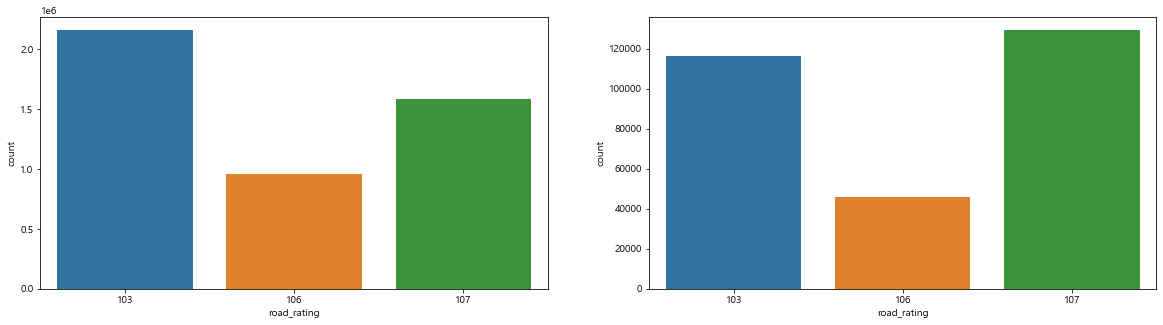

In [25]:
# road_rating
fig,ax = plt.subplots(figsize=[20, 5], ncols=2)

sns.countplot(x='road_rating', data=train, ax=ax[0])
sns.countplot(x='road_rating', data=test, ax=ax[1])

<AxesSubplot:xlabel='multi_linked', ylabel='count'>

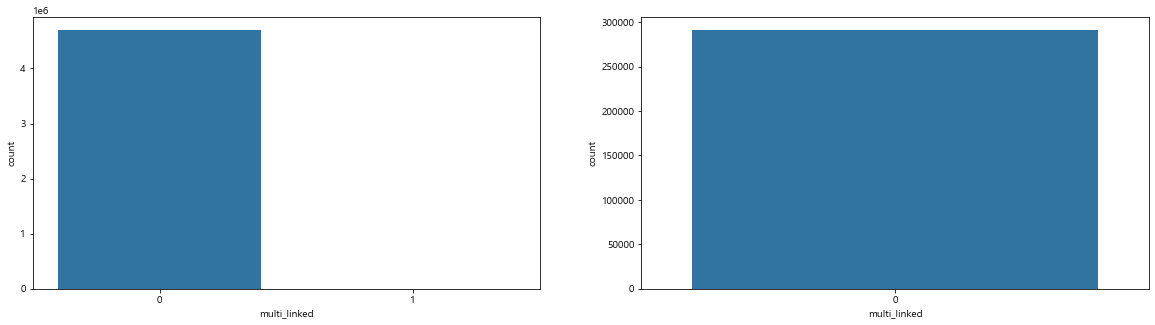

In [27]:
# multi_linked
fig,ax = plt.subplots(figsize=[20, 5], ncols=2)

sns.countplot(x='multi_linked', data=train, ax=ax[0])
sns.countplot(x='multi_linked', data=test, ax=ax[1])

<AxesSubplot:xlabel='connect_code', ylabel='count'>

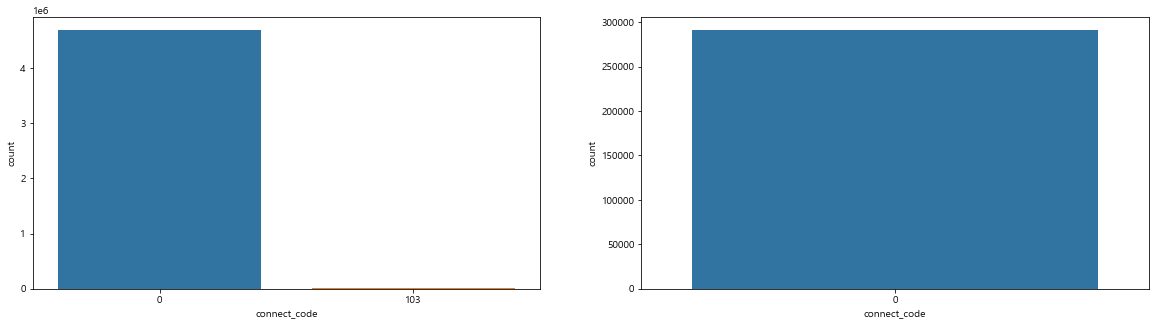

In [28]:
# connect_code
fig,ax = plt.subplots(figsize=[20, 5], ncols=2)

sns.countplot(x='connect_code', data=train, ax=ax[0])
sns.countplot(x='connect_code', data=test, ax=ax[1])

<AxesSubplot:xlabel='maximum_speed_limit', ylabel='count'>

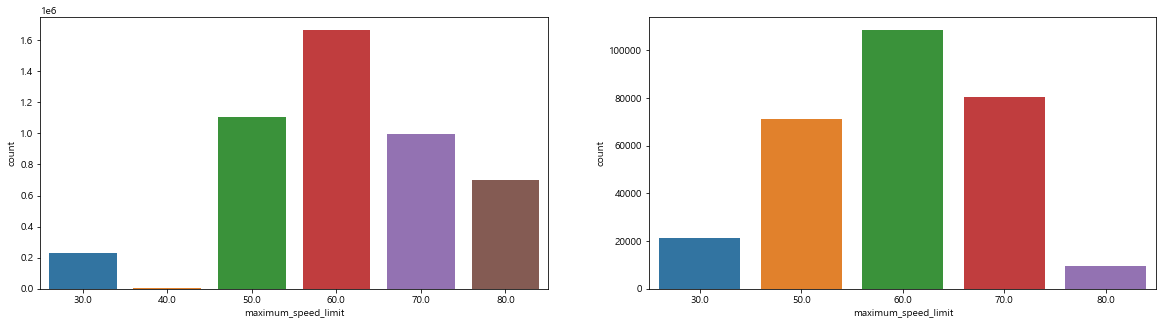

In [29]:
# maximum_speed_limit
fig,ax = plt.subplots(figsize=[20, 5], ncols=2)

sns.countplot(x='maximum_speed_limit', data=train, ax=ax[0])
sns.countplot(x='maximum_speed_limit', data=test, ax=ax[1])

<AxesSubplot:xlabel='weight_restricted', ylabel='count'>

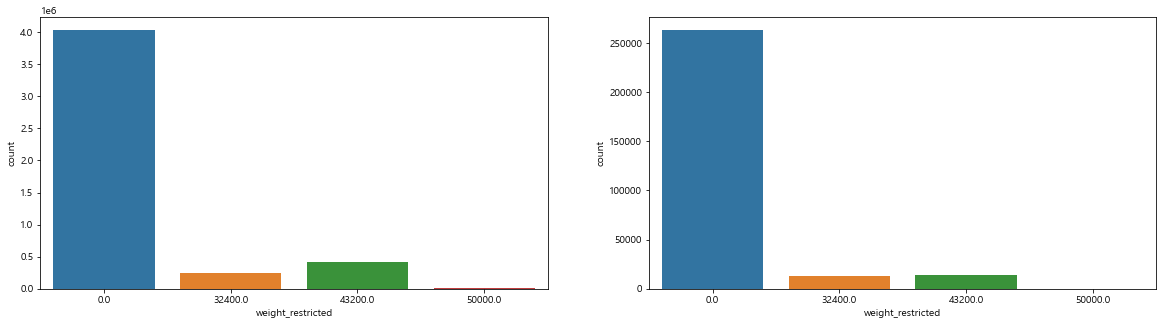

In [30]:
# weight_restricted
fig,ax = plt.subplots(figsize=[20, 5], ncols=2)

sns.countplot(x='weight_restricted', data=train, ax=ax[0])
sns.countplot(x='weight_restricted', data=test, ax=ax[1])

<AxesSubplot:xlabel='road_type', ylabel='count'>

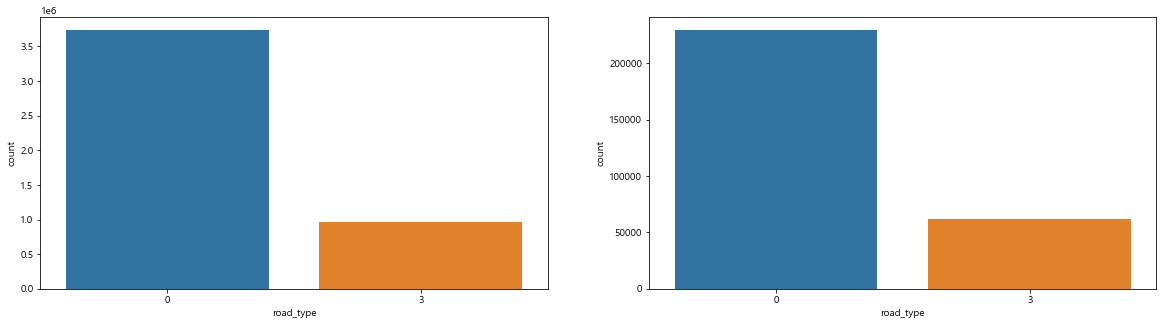

In [31]:
# road_type
fig,ax = plt.subplots(figsize=[20, 5], ncols=2)

sns.countplot(x='road_type', data=train, ax=ax[0])
sns.countplot(x='road_type', data=test, ax=ax[1])

### train과 test의 도로명 비교

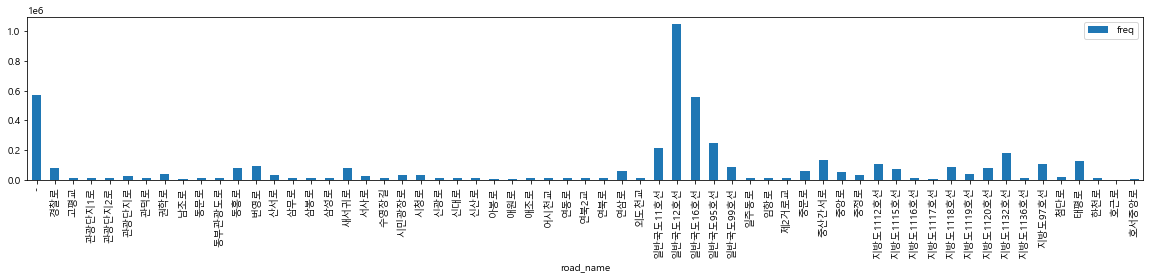

In [32]:
train1 = train.copy()
train1['freq'] = train1.groupby('road_name')['road_name'].transform('count')
train1 = train1[['road_name', 'freq']]
train1 = train1.groupby('road_name').mean().reset_index()
train1.plot.bar(x='road_name', y='freq', figsize=[20, 3])
plt.show()

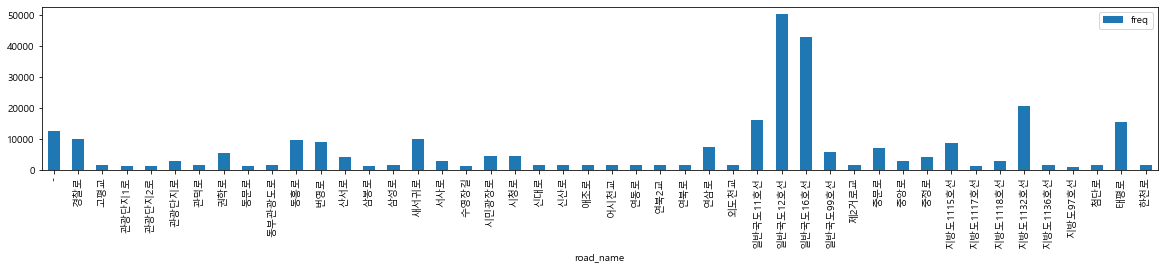

In [33]:
test1 = test.copy()
test1['freq'] = test1.groupby('road_name')['road_name'].transform('count')
test1 = test1[['road_name', 'freq']]
test1 = test1.groupby('road_name').mean().reset_index()
test1.plot.bar(x='road_name', y='freq', figsize=[20, 3])
plt.show()

## 3. 추이 그래프

In [36]:
# 그룹화
train_date = train[['base_date', 'target']]
train_date = train_date.groupby('base_date').mean().reset_index()

train_time = train[['base_hour', 'target']]
train_time = train_time.groupby('base_hour').mean().reset_index()

train_day = train[['day_of_week', 'target']]
train_day = train_day.groupby('day_of_week').mean()
train_day = train_day.reindex(['월', '화', '수', '목', '금', '토', '일']).reset_index()

train_name = train[['road_name', 'target']]
train_name = train_name.groupby('road_name').mean().reset_index()

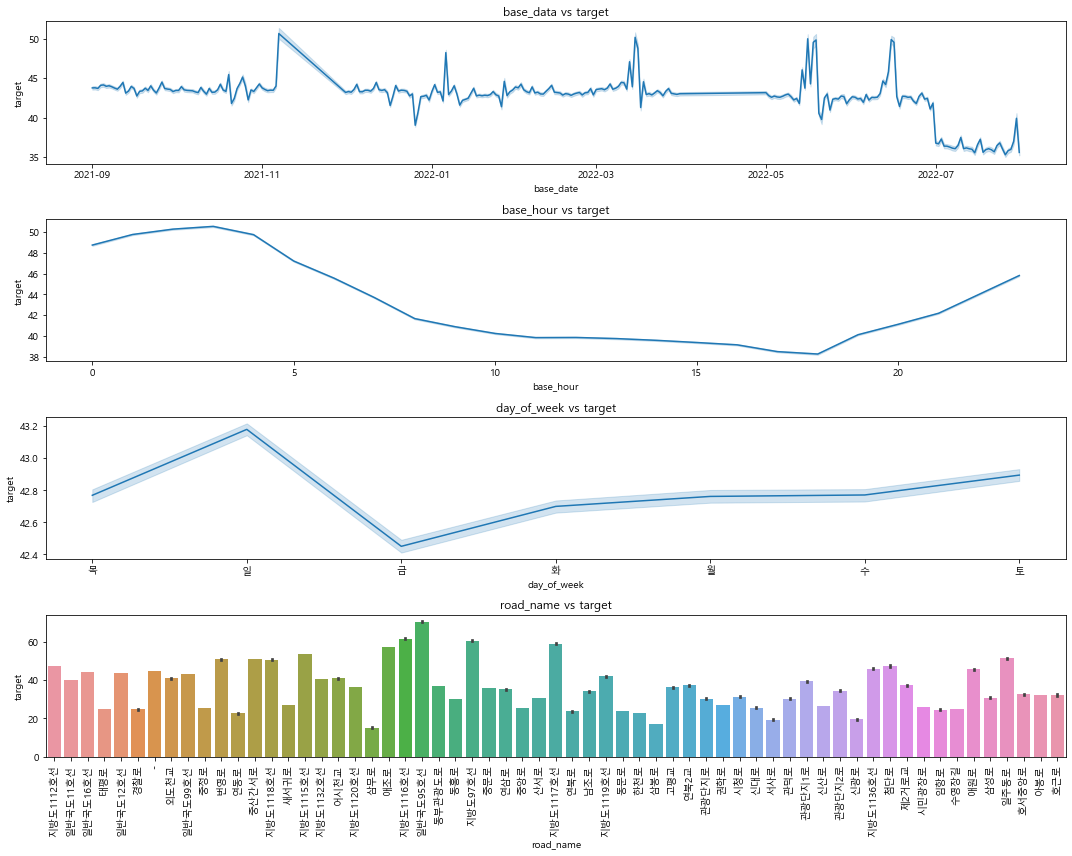

In [40]:
fig, axes = plt.subplots(4, figsize=[15, 12])

sns.lineplot(data=train, x='base_date', y='target', ax=axes[0]).set(title='base_data vs target')
sns.lineplot(data=train, x='base_hour', y='target', ax=axes[1]).set(title='base_hour vs target')
sns.lineplot(data=train, x='day_of_week', y='target', ax=axes[2]).set(title='day_of_week vs target')
sns.barplot(data=train, x='road_name', y='target', ax=axes[3]).set(title='road_name vs target')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# base_date = 2022년 7월 기준 교통량 증가
# base_hour = 00-05시, 18-24시 교통량 감소 / 05-18시 교통량 증가 (차이 큼)
# day_of_week = 금요일 교통량 증가, 주말 교통량 감소
# road_name = -로 기록된 null 값 존재

## 4. 년도/월/일별 추이 그래프

In [42]:
train['year'] = train['base_date'].dt.year
train['month'] = train['base_date'].dt.month
train['day'] = train['base_date'].dt.day

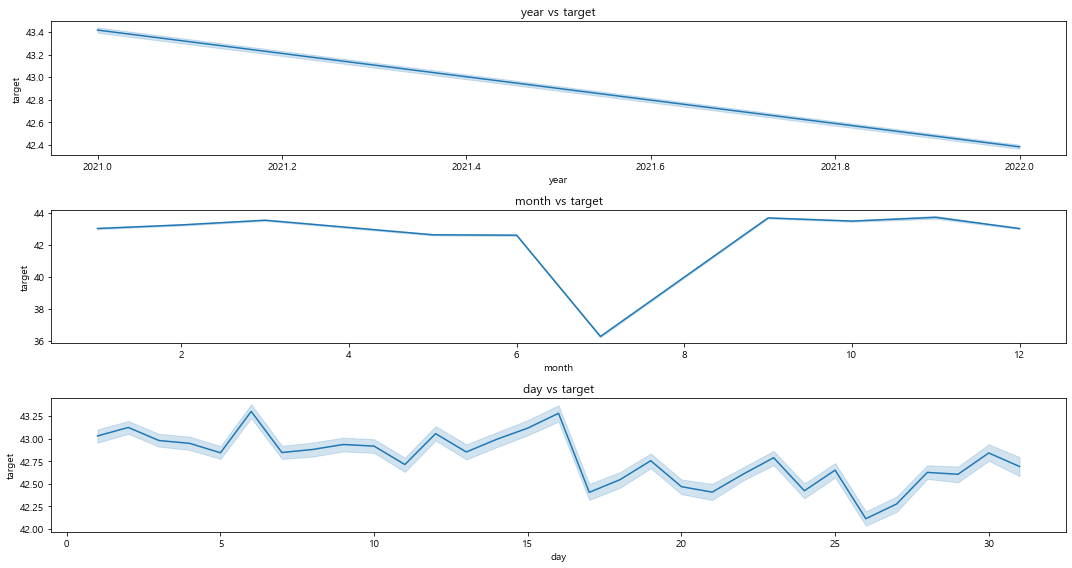

In [43]:
fig, axes = plt.subplots(3, figsize=[15, 8])

sns.lineplot(data=train, x='year', y='target', ax=axes[0]).set(title='year vs target')
sns.lineplot(data=train, x='month', y='target', ax=axes[1]).set(title='month vs target')
sns.lineplot(data=train, x='day', y='target', ax=axes[2]).set(title='day vs target')

plt.tight_layout()
plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder

items = ['day_of_week', 'road_name', 'start_node_name', 'start_turn_restricted', 'end_node_name', 'end_turn_restricted']
train1 = train.copy()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(train1[i])
    train1[i] = encoder.transform(train1[i])
train1

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day
0,TRAIN_0000000,2022-06-23,1,17,1,106,46,0,0,60.0,...,126.662612,0,386,33.427749,126.662335,0,52.0,2022,6,23
1,TRAIN_0000001,2022-07-28,1,21,2,103,34,0,0,60.0,...,126.529107,1,2,33.504811,126.526240,0,30.0,2022,7,28
2,TRAIN_0000002,2021-10-10,4,7,2,103,36,0,0,80.0,...,126.368598,0,179,33.280072,126.362147,0,61.0,2021,10,10
3,TRAIN_0000003,2022-03-11,0,13,2,107,57,0,0,50.0,...,126.567204,0,203,33.245565,126.566228,0,20.0,2022,3,11
4,TRAIN_0000004,2021-10-05,6,8,2,103,35,0,0,80.0,...,126.326551,0,269,33.462677,126.330152,0,38.0,2021,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,1,16,1,107,0,0,0,50.0,...,126.278125,0,42,33.420955,126.273750,0,20.0,2021,11,4
4701213,TRAIN_4701213,2022-03-31,1,2,2,107,0,0,0,80.0,...,126.424368,0,31,33.472525,126.424890,0,65.0,2022,3,31
4701214,TRAIN_4701214,2022-06-13,3,22,2,103,35,0,0,60.0,...,126.912579,0,214,33.444121,126.912948,0,30.0,2022,6,13
4701215,TRAIN_4701215,2021-10-20,2,2,2,103,37,0,0,80.0,...,126.431817,0,23,33.444996,126.433332,0,73.0,2021,10,20


C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


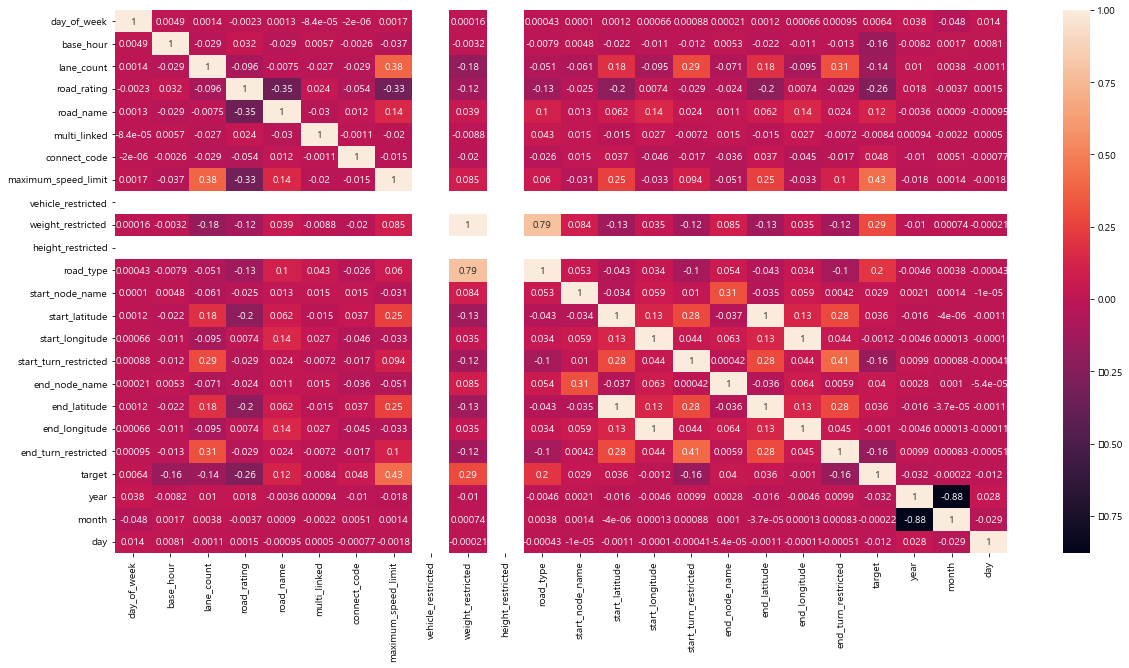

In [46]:
plt.figure(figsize=[20, 10])
sns.heatmap(train1.corr(), annot=True)
plt.show()

# maximum_speed_limit, weight_restricted, road_type 과 상관관계를 보임

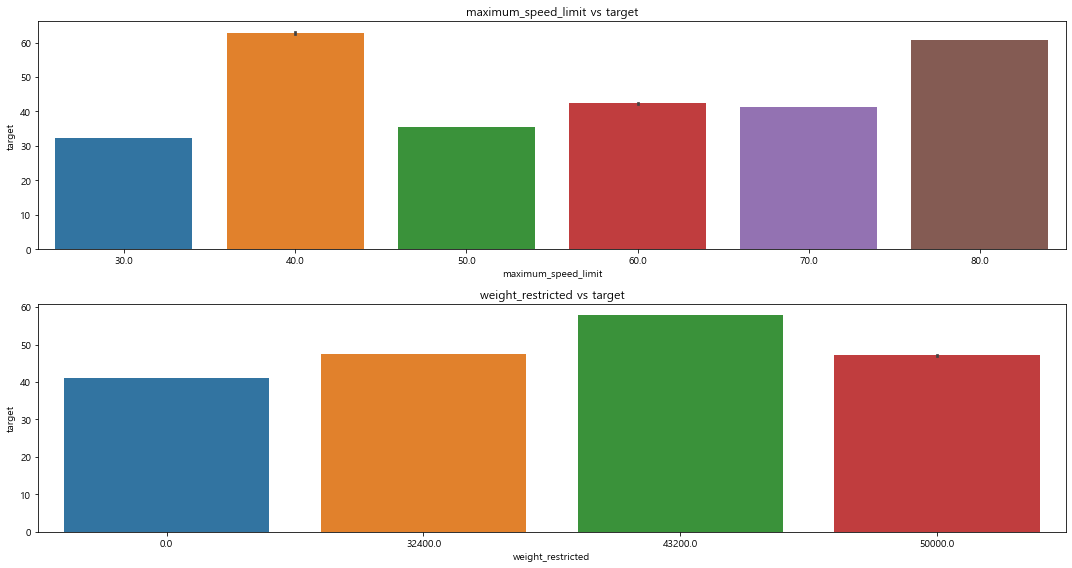

In [47]:
fig, axes = plt.subplots(2, figsize=[15, 8])

sns.barplot(x='maximum_speed_limit', y='target', data=train, ax=axes[0]).set(title='maximum_speed_limit vs target')
sns.barplot(x='weight_restricted', y='target', data=train, ax=axes[1]).set(title='weight_restricted vs target')

plt.tight_layout()
plt.show()